# LAB | Audio Classification CNN

## Introduction
This notebook guides you through audio classification using a CNN model on the Kaggle audio dataset. You will:
- Load and explore the dataset
- Apply various preprocessing methods (MFCC, Mel spectrogram, Chromagram)
- Build and train a CNN classifier on these features
- Experiment with preprocessing parameters to improve results

## Step 1: Setup & Dataset Loading

In [2]:
 #!pip install librosa 

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("warcoder/cats-vs-dogs-vs-birds-audio-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Amin\.cache\kagglehub\datasets\warcoder\cats-vs-dogs-vs-birds-audio-classification\versions\1


In [3]:
files_in_dir = os.listdir(path)
print(files_in_dir)

['Animals']


In [9]:
#TODO: create a dataframe
data = []
animals_path = os.path.join(path, 'Animals')
for label in os.listdir(animals_path):
    label_path = os.path.join(animals_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            if file.endswith('.wav'):
                data.append({'filepath': os.path.join(label_path, file), 'label': label})
df = pd.DataFrame(data)
print(df.head())

                                            filepath label
0  C:\Users\Amin\.cache\kagglehub\datasets\warcod...  bird
1  C:\Users\Amin\.cache\kagglehub\datasets\warcod...  bird
2  C:\Users\Amin\.cache\kagglehub\datasets\warcod...  bird
3  C:\Users\Amin\.cache\kagglehub\datasets\warcod...  bird
4  C:\Users\Amin\.cache\kagglehub\datasets\warcod...  bird


In [14]:
print(f"Total audio files found: {len(df)}")
print("\nLabel distribution:")
print(df['label'].value_counts())

Total audio files found: 610

Label distribution:
label
dog     210
cat     207
bird    193
Name: count, dtype: int64


## Step 2: Audio Preprocessing Functions

Define functions for feature extraction you will experiment with:

- MFCC
- Spectrogram
- Chromogram

In [20]:
##TODO: Your_Code_Here
# MFCC extraction
def extract_mfcc(file_path, n_mfcc=40, max_len=174):
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0,0),(0,pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

In [23]:
# Mel Spectrogram extraction
def extract_mel(file_path, n_mels=128, max_len=174):
    audio, sr = librosa.load(file_path, sr=None)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    if mel_db.shape[1] < max_len:
        pad_width = max_len - mel_db.shape[1]
        mel_db = np.pad(mel_db, pad_width=((0,0),(0,pad_width)), mode='constant')
    else:
        mel_db = mel_db[:, :max_len]
    return mel_db

In [28]:
# Chromagram extraction
def extract_chroma(file_path, max_len=174):
    audio, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    if chroma.shape[1] < max_len:
        pad_width = max_len - chroma.shape[1]
        chroma = np.pad(chroma, pad_width=((0,0),(0,pad_width)), mode='constant')
    else:
        chroma = chroma[:, :max_len]
    return chroma

## Step 3: Visualize Audio Features

Visualize extracted features for a sample audio file:

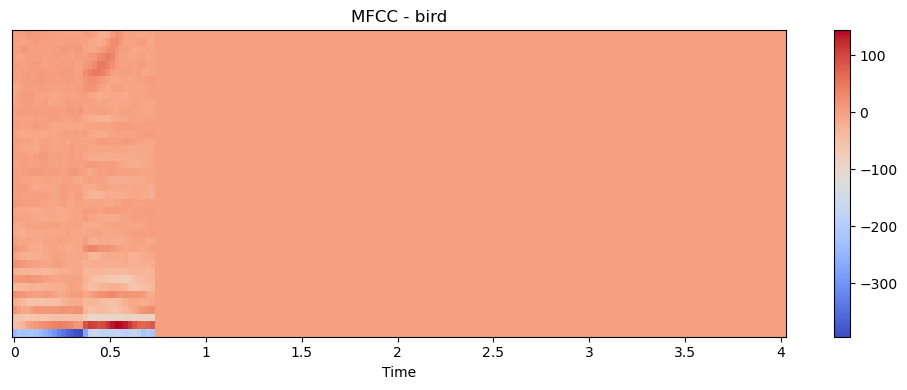

In [21]:
##TODO: Your_Code_Here
sample_file = df['filepath'].iloc[0]
mfcc = extract_mfcc(sample_file)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title(f"MFCC - {df['label'].iloc[0]}")
plt.tight_layout()
plt.show()

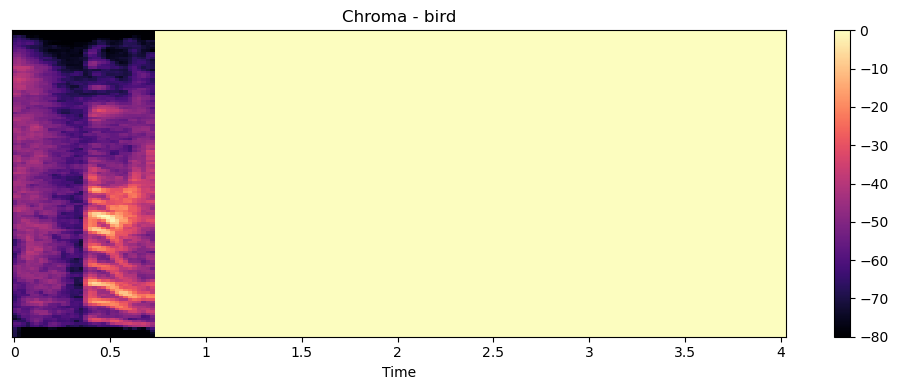

In [ ]:
sample_file = df['filepath'].iloc[0]
mel = extract_mel(sample_file)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel, x_axis='time')
plt.colorbar()
plt.title(f"MEL - {df['label'].iloc[0]}")
plt.tight_layout()
plt.show()

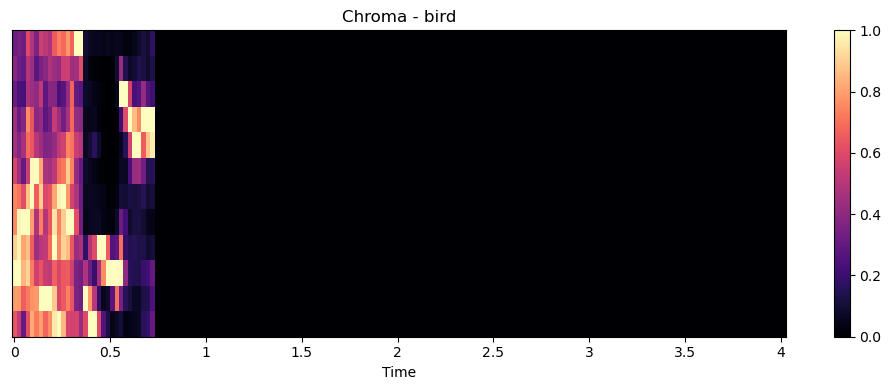

In [32]:
sample_file = df['filepath'].iloc[0]
chroma = extract_chroma(sample_file)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title(f"Chroma - {df['label'].iloc[0]}")
plt.tight_layout()
plt.show()

## Step 4: Prepare Data for CNN

Extract features for all files and prepare train/test sets:

In [33]:
##TODO: Your_Code_Here
# Choose feature extractor: extract_mfcc, extract_mel, or extract_chroma
feature_extractor = extract_mfcc 

X = []
y = []

for idx, row in df.iterrows():
    features = feature_extractor(row['filepath'])
    X.append(features)
    y.append(row['label'])


X = np.array(X)
X = X[..., np.newaxis]  # Add channel dimension for CNN

# Encode labels
labels = sorted(df['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(labels)}
y = np.array([label_to_idx[label] for label in y])
y = to_categorical(y, num_classes=len(labels))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (488, 40, 174, 1) (488, 3)
Test shape: (122, 40, 174, 1) (122, 3)


In [ ]:
# Feature extractor: extract_mel
feature_extractor = extract_mel

X = []
y = []

for idx, row in df.iterrows():
    features = feature_extractor(row['filepath'])
    X.append(features)
    y.append(row['label'])


X = np.array(X)
X = X[..., np.newaxis]  # Add channel dimension for CNN

# Encode labels
labels = sorted(df['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(labels)}
y = np.array([label_to_idx[label] for label in y])
y = to_categorical(y, num_classes=len(labels))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

## Step 5: Define CNN Model

In [34]:
##TODO: Your_Code_Here

#Simple CNN model for audio classification
input_shape = X_train.shape[1:]  

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 172, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 42, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 42, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,752,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,771,843 (10.57 MB)

 Trainable params: 2,771,843 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train and Evaluate

In [35]:
##TODO: Your_Code_Here

# Train the CNN model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.3422 - loss: 8.9983 - val_accuracy: 0.3770 - val_loss: 1.1019
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3443 - loss: 1.2005 - val_accuracy: 0.4180 - val_loss: 1.0789
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3770 - loss: 1.0917 - val_accuracy: 0.4918 - val_loss: 1.0848
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3668 - loss: 1.0972 - val_accuracy: 0.4754 - val_loss: 1.0861
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3955 - loss: 1.0812 - val_accuracy: 0.4180 - val_loss: 1.0859
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4078 - loss: 1.0732 - val_accuracy: 0.4508 - val_loss: 1.0814
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4180 - loss: 1.0589 - val_accuracy: 0.5164 - val_loss: 1.0656
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4816 - loss: 1.0307 - val_accuracy: 0.5984 - 

## Step 7: Experimentation

- Try using Mel Spectrogram and Chromagram as features instead of MFCC by changing the `feature_extractor` function in the data preparation.
- Modify parameters like `n_mfcc`, `n_mels`, `max_len`.
- Tune CNN architecture (add layers, change filters).
- Compare results and report observations.


In [ ]:
#Expremineting with each feature extractor and comparing them
extractors = [
    ("MFCC", extract_mfcc),
    ("Mel Spectrogram", extract_mel),
    ("Chromagram", extract_chroma)
]

results = {}

for name, feature_extractor in extractors:
    print(f"\n--- Training with {name} features ---")
    X = []
    y = []
    for idx, row in df.iterrows():
        features = feature_extractor(row['filepath'])
        X.append(features)
        y.append(row['label'])
    X = np.array(X)
    X = X[..., np.newaxis]
    labels = sorted(df['label'].unique())
    label_to_idx = {label: idx for idx, label in enumerate(labels)}
    y = np.array([label_to_idx[label] for label in y])
    y = to_categorical(y, num_classes=len(labels))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    input_shape = X_train.shape[1:]
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test accuracy: {test_acc:.4f}")
    results[name] = test_acc

print("\nSummary of test accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


--- Training with MFCC features ---
MFCC Test accuracy: 0.9262

--- Training with Mel Spectrogram features ---
Mel Spectrogram Test accuracy: 0.8934

--- Training with Chromagram features ---
Chromagram Test accuracy: 0.5328

Summary of test accuracies:
MFCC: 0.9262
Mel Spectrogram: 0.8934
Chromagram: 0.5328


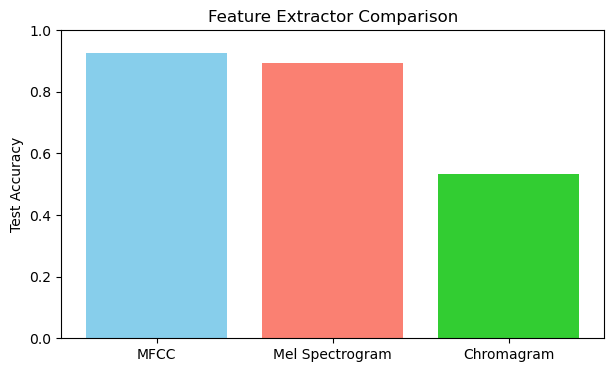

In [37]:
# Visualize test accuracies for each feature extractor
plt.figure(figsize=(7, 4))
plt.bar(results.keys(), results.values(), color=['skyblue', 'salmon', 'limegreen'])
plt.ylabel('Test Accuracy')
plt.title('Feature Extractor Comparison')
plt.ylim(0, 1)
plt.show()